# Percolation in 2D Group Project

### Authors: 
### yl24424 Zirui  Zhang, tq24859  Hang Si, wg23292  Heying Ding, bd24072  Victor Sze      
 



  



## Introduction: What is Percolation?
(by Victor)

**Percolation theory** describes the connectivity of a randomly structured network or lattice. The mathematical study of percolation has been widely applied in fields such as materials science, epidemiology, earth science.
In real life, it is often used to describe the flow of liquid through in soil or the process of coffee brewing. 

In this project, our investigation focuses on the percolation in 2-dimensional grids, studying its connectivity and understanding its behaviour in random lattices. 
We build a percolation model in an $n \times n$ square grid. Each site of the $n \times n$ square grid is coloured yellow (occupied/ open) with probability $p$, and blue (closed) with probability $1−p$. Two sites are considered adjacent if their coordinates differ by 1 either vertically or horizontally. We assume each site of the grid is independent, which means whether one site is open or closed, does not influence the state of any other site in the grid.

In this percolation model, it is only possible to connect through adjacent and open sites. We aim to study the probability $F_n(p)$ that there is a yellow path connecting the left boundary to the right boundary of the grid.

$$ F_n(p) = \mathbb{P}(\text{there is a yellow path connecting left to right on an } n \times n \text{ grid}). $$
, which 
$$\lim_{n \to \infty} F_n(p) = F(p),$$
This represents the probability of an open path connecting the left and right boundaries. Moreover, we investigate different situations and extensions of the model.

By running simulations with different grid size $n$ and open grid probability $p$, we can estimate the critical probability $p_c$. When a critical percolation occurs, i.e. $p$ is around $p_c$ ,$F_n(p)$ shows sharp transition. This sudden change in behaviour is called **"phase transition"**

----
### This project is divided into six sections, which focus on:
1. **Grid Visualisation** $n \times n$ grid in different p values. (Assigned to _Zirui_)

2. **Building Algorithm** 
- Function to determine the connectivity of random grids (Assigned to _Hang Si_)

- Optimising the estimation of the function for larger n. (Assigned by _Heying_)

3. **Estimate Critical probability p_c** by simulations (Assigned to _Victor_)

4. **Explore Variations** Percolation behavior in different geometry 
- Percolation on Rectangular grid. (Assigned to _Heying_)

- Centre to boundary connectivity. (Assigned to _Hang Si_)

5. **Percolation on Triangular lattice** (Assigned to _Victor_)
- Percolation on Triangular lattice. 

- Asymptotic power law behaviour near $p_c$ for triangular lattice. 

- Crossing probability of Triangular lattice after roatation. 


6. **Alternate detect methods**

- Wall-following algorithm and site exploration behaviour. (Assigned to _Hang Si_)

- Uniform Random Labels & Minimum Threshold Estimation. (Assigned to _Zirui_)

  
Throughout this project, we use Python as our programming language, also utilised NumPy and Matplotlib to help generate grids and simulations. We conduct topic research, observate model behavior, analyse data and explore the emergence of connectivity.


## Imported libaraies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from collections import deque

# Section 1: Visualising Random Percolation grids

### What does a percolation grid looks like?

To start off, we create code to generate some $n × n$ square grids which are coloured yellow and blue for each independent site, with probability $p$ and $1-p$ respectively. We use **NumPy** to generate random grid data.

Using **Matplotlib**, we visualise $20 × 20$ square grids for different $p$ values. This helps us to understand the connectivity between left and right boundaries and the structure of the grid under different probabilities.

In [2]:
def sample_grid(n=20, p=0.5):
    # make a grid of yellow/blue cells (1 = yellow, 0 = blue)
    return (np.random.rand(n, n) < p).astype(int)

def show_grid(grid, title=None):
    # show the grid as an image
    fig, ax = plt.subplots()

    # 0 = blue(closed), 1 = yellow(open)
    cmap = colors.ListedColormap(["blue", "yellow"])
    ax.imshow(grid, cmap=cmap)

    # remove axis numbers of the grids
    ax.set_xticks([])
    ax.set_yticks([])

    # labelling
    if title:
        ax.set_title(title)

    plt.show()

For each chosen value of p, we generate several random yellow/blue grids and plot the results. So we can see the spread of yellow clusters while p is changing.

p = 0.4
p = 0.5
p = 0.7


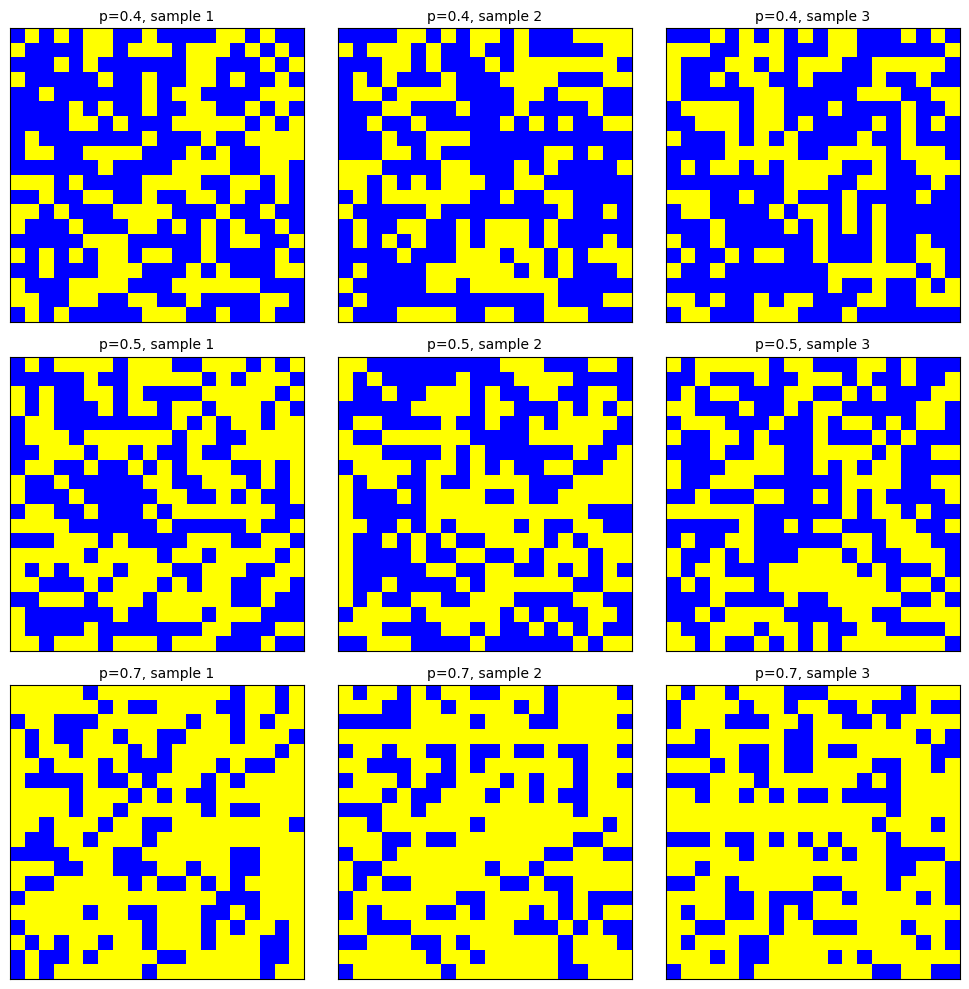

In [3]:
def main():
    n = 20
    # try different p values
    probs = [0.4, 0.5, 0.7]

    # make the plots for different p values
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    for row, p in enumerate(probs):
        print("p =", p) #print p value in console

        #generate 3 samples for each p
        for col in range(3):
            grid = sample_grid(n, p)
            ax = axes[row][col]

            #display&labelling

            cmap = colors.ListedColormap(["blue", "yellow"])
            ax.imshow(grid, cmap=cmap)
            #ax.imshow(grid, cmap="viridis")
            ax.set_title(f"p={p}, sample {col+1}", fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    plt.show()

main()

### Observation
By comparing $p = 0.4, 0.5, 0.7$, we notice that 
- As $p$ increase, there are more connected and larger yellow clusters. 
- Randomness affects pattern, even with the same probability $p$.

# Section 2: Percolation Connectivity

## 2.1 Connectivity detection algorithm
After visualising the random percolation grid in Core 1, the next step is to determine whether there is a yellow (open) path from the left boundary to the right boundary of $n × n$ grid. 

In this section, we implement an algorithm that identifies all reachable points starting from the left edge, and then checks whether any of these points reach the right edge.

### logic behind the algorithm

We adopted the iterative exploration method recommended in the project description:

1. **All yellow points on the left boundary** are initially marked as reachable.

2. For each reachable site, we check its **four neighbours** (up, down, left, right).

3. If an adjacent position is yellow and has not been visited before, it will be added to the set of reachable positions.

4. This process continues until no new reachable positions can be added.

5. If any reachable position is on the right boundary, there is a yellow path from left to right.

This method is equivalent to performing a **breadth-first search (BFS)** on the graph of open sites.


### Implementation

We first define a helper function that returns all open sites on the left boundary:


In [4]:
# return all yellow sites on the left boundary
def get_left_yellow_sites(grid):
    n = grid.shape[0]
    starts = []
    for i in range(n):
        if grid[i, 0]:
            starts.append((i, 0))
    return starts


# slow BFS version: check left–to–right percolation
def percolates_left_to_right_slow(grid: np.ndarray) -> bool:
    n = grid.shape[0]
    assert grid.shape == (n, n)
    assert grid.dtype == bool

    visited = np.zeros_like(grid, dtype=bool)
    q = deque()

    # initial queue: open sites on left edge
    for i in range(n):
        if grid[i, 0]:
            visited[i, 0] = True
            q.append((i, 0))

    # BFS
    while q:
        x, y = q.popleft()

        # reached right edge
        if y == n - 1:
            return True

        # 4-neighbourhood
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n:
                if grid[nx, ny] and not visited[nx, ny]:
                    visited[nx, ny] = True
                    q.append((nx, ny))

    return False

Then, using this initial set of reachable sites, we implement a BFS-like search to detect if there is a path from left to right:

In [5]:
# optimised BFS check for left–to–right percolation
def percolates_left_to_right(grid):
    n = grid.shape[0]
    assert grid.shape == (n, n)
    assert grid.dtype == bool

    visited = np.zeros_like(grid, dtype=bool)
    q = deque()

    # start from open sites on left edge
    for i in range(n):
        if grid[i, 0]:
            visited[i, 0] = True
            q.append((i, 0))

    while q:
        x, y = q.popleft()

        # reached right edge
        if y == n - 1:
            return True

        # 4-neighbourhood
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n:
                if grid[nx, ny] and not visited[nx, ny]:
                    visited[nx, ny] = True
                    q.append((nx, ny))

    return False

Example of output:

In [6]:
grid_test = np.array([
    [1,0,0,0,1],
    [1,1,0,1,1],
    [0,1,1,1,0],
    [0,0,0,1,1],
    [1,1,1,0,0]
], dtype=bool)

print(grid_test.astype(int))
print("Left-to-right yellow path exists:", percolates_left_to_right(grid_test))

[[1 0 0 0 1]
 [1 1 0 1 1]
 [0 1 1 1 0]
 [0 0 0 1 1]
 [1 1 1 0 0]]
Left-to-right yellow path exists: True


In [7]:
def random_grid(n, p):
    return (np.random.rand(n, n) < p)

g = random_grid(20, 0.4)
print("when p = 0.4,can it go across", percolates_left_to_right(g))

g2 = random_grid(20, 0.7)
print("p = 0.7, can it go across？", percolates_left_to_right(g2))

when p = 0.4,can it go across False
p = 0.7, can it go across？ True


### Results

Using this function, we can automatically determine whether a percolating path exists for a given grid.

Repeated experiments with different values of $p$ show a clear pattern:

- For very small $p$, there are very few reachable points across the entire grid, and therefore few paths.
- Near $p \approx 0.5928$, some networks appear to be fully connected, while others do not, indicating that the system is close to the critical region（in Stauffer, D., & Aharony, A.'s [1]).
- For larger 𝑝, almost every grid contains a complete path from left to right.

This behaviour is consistent with the phase transition phenomena described in percolation theory.

## 2.2 Making the path search faster

### limitation of the code

In the previous section, we wrote a Breadth-first-search style function to check whether there is any yellow path connecting the left side of the grid to the right side.
It works perfectly for small grid sizes, but when it comes to **larger values of $n$**, the code starts to feel noticeably slow. We noticed that some grids are being repeatedly checked which increase computations.

### Improving efficiency
In this part, we aim to  **improve the efficiency** of the code and speed up the path searching process.
The main idea remains the same : starting from the left boundary and exploring all reachable yellow sites.
On top of that, we tried to reduce unnecessary movements when reaching the rightmost column.



In [8]:
def has_path_optimised(M):
    # size of the grid
    n = M.shape[0]

    # all yellow sites on the left edge
    frontier = [(i, 0) for i in range(n) if M[i, 0] == 1]

    # set for quick membership check
    seen = set(frontier)

    # go through the list like a queue
    k = 0
    while k < len(frontier):
        x, y = frontier[k]
        k += 1

        # reached the right side
        if y == n - 1:
            return 1

        # collect neighbours of (x, y)
        nbrs = []
        if y + 1 < n:
            nbrs.append((x, y + 1))
        if y - 1 >= 0:
            nbrs.append((x, y - 1))
        if x + 1 < n:
            nbrs.append((x + 1, y))
        if x - 1 >= 0:
            nbrs.append((x - 1, y))

        # check which neighbours are yellow and new
        for s in nbrs:
            if M[s] == 1 and s not in seen:
                frontier.append(s)
                seen.add(s)

    # no left-to-right path found
    return 0

# Section3: Estimating the Phase Transition

In Section 2.1, it was noted that:

**Near $p \approx 0.6$, some networks appear to be fully connected, while others do not, indicating that the system is close to the critical region.**

The main purpose of this section is to validate the concept through simulation, calculation and analysis.



### How to estimate critical probability

1. Generate a random grid with each site coloured yellow(open, 1) and blue(closed, 0)

2. Use depth-first-search (DFS) style algorithm to check percolation connectivity

3. Repeat estimating $F_n(p)$ for each set of $p$ and $n$(Monte Carlo simulation)

4. Plot a graph of the estimated $F_n(p)$(y-axis) against $p$(x-axis), with some sizes $n$

5. Analyse and identify critical probability


### Why we use **Depth-First search(DFS)**, not Breadth-First Search(BFS)?

Although they both detect the percolation connectivity of the grid perfectly, there are some unique advantages for Depth-First Search compared to Breadth-First Search:

- When using DFS, we use less memory comparing to BFS, which can lead to a shorter runtime.

- It is more efficient for long connected structure.

- Since we only concern about the connectivity whether a path exist between left and right boundaries, ddo not need to shortest path.









In [9]:
# 1. Use function in section 1, generate nxn random grid(numpy), 
# Open(True) with probability p, closed(False) with 1-p
def sample_grid(n, p):
    return np.random.rand(n, n) < p

# 2. Using DFS function to check left-right connectivity
def is_percolating(grid):
    n = grid.shape[0]
    # identify visited sites, prevent checking same site again
    visited = np.zeros_like(grid, dtype=bool) 

    # Starting from left boundary(DFS)
    stack = [(i, 0) for i in range(n) if grid[i, 0]] 
    
    # Find reachable sites
    while stack:
        x, y = stack.pop() # Pop out the last appended site

        # skip the popped out sites if it's marked as visited
        if visited[x, y]:
            continue

        visited[x, y] = True # mark current site as visited 
        
        # Success: When left and right boundary connect = True
        if y == n - 1:  # reach the right boundary
            return True
        
        # Checking sites from 4 directions for possible moves 
        for new_x, new_y in [(x+1,y), (x-1,y), (x,y+1), (x,y-1)]:
            # check if they are inside the grid, open(yellow site), and not yet visited
            if 0 <= new_x < n and 0 <= new_y < n and grid[new_x, new_y] and not visited[new_x, new_y]:
                stack.append((new_x, new_y)) # Valid sites go to stack 

    # Fail: no percolation exist in this grid = False
    return False



### How does the function "is_percolating" work?

1. Start from left boundary of the grid, store them in *stack*.

2. *pop* the last site appended from the stack, if it has already been visited, skip it and go back to the beginning of the loop, otherwise mark it as *visited*.

3. If the site reaches the right boundary (successfully percolate), return *True*.

4. If not, search for neighbour(s) that is inside the grid, open(yellow site), and not yet visited, then add any valid neighbour back to the *stack* (*append*).

5. Loop until the stack is empty, that means no left-right percolation exist, Return *False*.

-----
After that, We estimate 
$$ F_n(p) = \mathbb{P}(\text{there is a yellow path connecting left to right on an } n \times n \text{ grid}). $$
for different grid size $n$ and probability $p$ then generate **a curve plot** across four grid sizes $n = 20, 30, 80, 120$, with open site probability $p \in [0.3,0.8]$, to compare the behavior of $F_n(p)$.

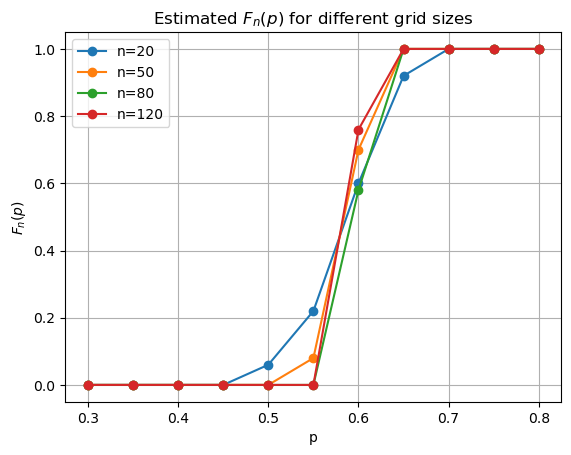

In [10]:
# 3. Compute F_n(p), 50 trials for each pair of (n, p)
def estimate_Fn(n, p, trials=50):
    count = 0
    for _ in range(trials):
        grid = sample_grid(n, p) # generate random grids
        if is_percolating(grid): # if percolate then count as success
            count += 1 
    return count / trials # find success rate of percolation 

# 4. plot a curve plot for F_n(p) against p, to observe the phase transition 
ps = np.linspace(0.3, 0.8, 11) # Evenly spaced p 
n_values = [20, 50, 80, 120]  # different grid size n 
results = {}

# Estimate F_n(p) for (n, p)
for n in n_values:
    results[n] = [estimate_Fn(n, p) for p in ps]

# Plotting
plt.figure()
for n in n_values:
    plt.plot(ps, results[n], marker='o', label=f"n={n}")

# labelling
plt.xlabel("p")
plt.ylabel(r"$F_n(p)$")
plt.title("Estimated $F_n(p)$ for different grid sizes")
plt.legend()
plt.grid(True)
plt.show()


### Observation and explanation

The graph shows the percolation probability curve in different size $n$. For different grid size $n$ and probability p ranging from $0.3$ to $0.8$, we can see the curve becomes steeper as n increases. 

From the graph, we can see at around $\approx 0.6$, the estimated probability of percolation $F_n(p)$ increase rapidly from 0 to 1. The behavior indicates the critcial probability $p_c \approx 0.6$, and suggesting convergence towards the theoretical critical probability as $n$ increase.

In other words, when $p < p_c$, the random n-square grid is very unlikely to percolate. When $p > p_c$, the random n-square grid becomes very likely to percolate for $p_c \approx 0.6$.  

Additionally, by running more Monte Carlo trials and using larger values of $n$, we can obtain a more accurate approximation of $F_n(p)$ and $p_c$. A larger grid makes the curve steeper, makes the **Phase transition** clearer to observe, and the critical value easier to identify. As $n \to \infty$, $F_n(p)$ will get closer to a step function, jumping from 0 to 1 at $p_c$. 
The estimated critical probability will converge to the theoretical critical probability,
 
 $$\lim_{n \to \infty} \hat{p}_c(n) = p_c
 $$
where $ \hat{p}_c(n) $ is the estimated critical probability for grid size $n$.




# Section4: Exploring Alternative Percolation model

## 4.1: Retangular Grids 

In this extention, we would try to explore when the grid is not a standard $n \times n$ square, instead, a rectangular grid with different aspect ratios, such as $2n \times n$, whether the percolation probability $F_{m,n}(p)$ and critical point will be change or not.

### Method 
1. Choose different rectangular grid such as $2n \times n$.

2. For every probability $p$, generate multiple random grids where every site is open (yellow) with probability $p$ and closed (blue) with probability $1 - p$.

3. Use the same BFS left-to-right method in the core part(Section2).

4. For each $p$, run many times and then estimate
$$F_{m,n}(p) = \mathbb{P}(Left - to -right)$$

5. Plot different curves $F_{m,n}(p)$ graph for different rectangles and compare them.

In [11]:
# Generate rectangular grids 
def generate_rect_grid(rows: int, cols: int, p: float,
                       rng: 'np.random.Generator' = None) -> np.ndarray:
    """
    Generate a rows×cols grid; every site is open with probability p.
    """
    if rng is None:
        rng = np.random.default_rng()
    return rng.random((rows, cols)) < p


def show_rect_examples(n: int = 40, p: float = 0.6,
                       rng: 'np.random.Generator' = None) -> None:
    """
    Show example 2n×n and 3n×2n grids for a given p.
    """
    if rng is None:
        rng = np.random.default_rng()

    shapes = [
        (2 * n, n,  "2n-by-n"),
        (3 * n, 2 * n, "3n-by-2n"),
    ]


  

    fig, axes = plt.subplots(1, len(shapes), figsize=(10, 5))

    for ax, (rows, cols, label) in zip(axes, shapes):
        grid = generate_rect_grid(rows, cols, p, rng)
        cmap = colors.ListedColormap(["blue", "yellow"])
        ax.imshow(grid, cmap=cmap)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{label}, p={p:.2f}")

    plt.tight_layout()
    plt.show()


# Percolation check (rectangular)
def percolates_left_to_right_rect(grid: np.ndarray) -> bool:
    """
    Use BFS to test if there is an path from left to right in the grid.
    """
    rows, cols = grid.shape
    visited = np.zeros((rows, cols), dtype=bool)
    q = deque()

    # Start from open sites on left edge
    for r in range(rows):
        if grid[r, 0]:
            visited[r, 0] = True
            q.append((r, 0))

    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while q:
        r, c = q.popleft()
        if c == cols - 1:  # reached right edge
            return True

        for dr, dc in steps:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                if grid[nr, nc] and not visited[nr, nc]:
                    visited[nr, nc] = True
                    q.append((nr, nc))

    return False


# Estimate F_n(p)
def estimate_Fn_rect(rows: int, cols: int, p: float,
                     trials: int = 100,
                     rng: 'np.random.Generator' = None) -> float:
    """
    Estimate F(p) by running many grids and counting left–right percolation.
    """
    # Monte Carlo estimate of F_n(p)
    if rng is None:
        rng = np.random.default_rng()

    count = 0
    for _ in range(trials):
        grid = generate_rect_grid(rows, cols, p, rng)
        if percolates_left_to_right_rect(grid):
            count += 1

    return count / trials


def compute_Fn_curve_rect(rows: int, cols: int,
                          ps: np.ndarray,
                          trials: int = 100,
                          rng: 'np.random.Generator' = None):
    """
    Compute F(p) for a range of p and estimate p_c from F(p) ≈ 0.5.
    """
    if rng is None:
        rng = np.random.default_rng()

    Fn_vals = []
    for p in ps:
        Fn_vals.append(estimate_Fn_rect(rows, cols, p, trials, rng))
    Fn_vals = np.array(Fn_vals)

    # nearest point to 0.5
    idx = np.argmin(np.abs(Fn_vals - 0.5))

    # Optional linear interpolation for refinement
    if 0 < idx < len(ps) - 1:
        p1, p2 = ps[idx - 1], ps[idx + 1]
        F1, F2 = Fn_vals[idx - 1], Fn_vals[idx + 1]

        if (F1 - 0.5) * (F2 - 0.5) < 0:  
            # straddle 0.5
            p_c_est = np.interp(0.5, [F1, F2], [p1, p2])
        else:
            p_c_est = ps[idx]
    else:
        p_c_est = ps[idx]

    return Fn_vals, p_c_est

### Example experiments 

As an example, we calculated the percolation curves $F_{m,n}(p)$ for two rectangular grids $(50 \times 100 \text{ and } 150 \times 100)$ over a range of occupation probabilities $p$. The resulting curves are shown in the figure below.

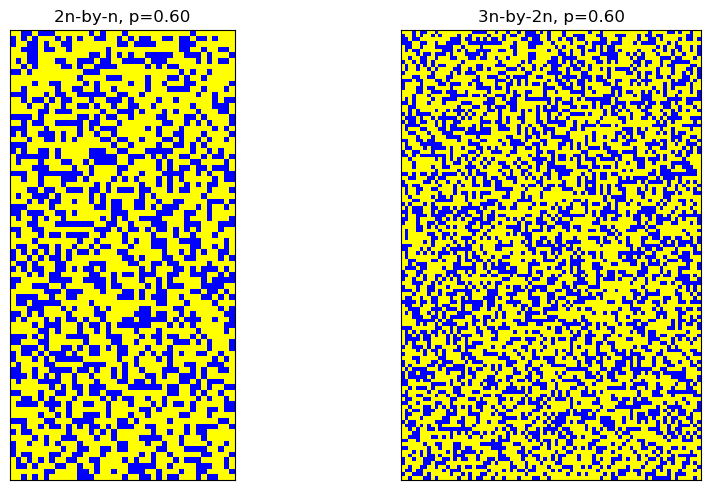

Estimated p_c for 50×100: 0.603
Estimated p_c for 150×100: 0.599


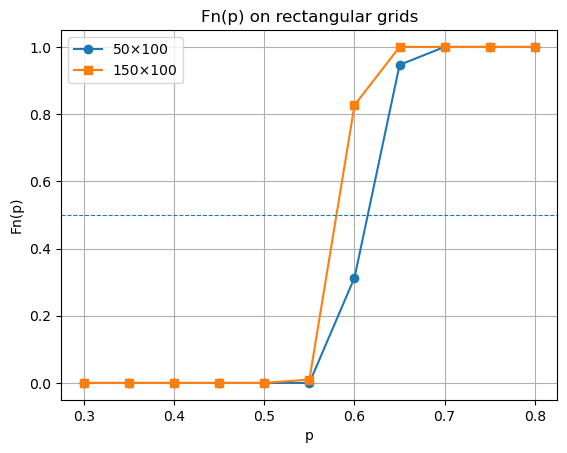

In [12]:
show_rect_examples(n=40, p=0.6)

n = 50
ps = np.linspace(0.3, 0.8, 11)
trials = 300

rows1, cols1 = n, 2 * n
Fn_1, p_c_1 = compute_Fn_curve_rect(rows1, cols1, ps, trials)

rows2, cols2 = 3 * n, 2 * n
Fn_2, p_c_2 = compute_Fn_curve_rect(rows2, cols2, ps, trials)

print(f"Estimated p_c for {rows1}×{cols1}: {p_c_1:.3f}")
print(f"Estimated p_c for {rows2}×{cols2}: {p_c_2:.3f}")

# Plot curves
plt.figure()
plt.plot(ps, Fn_1, marker="o", label=f"{rows1}×{cols1}")
plt.plot(ps, Fn_2, marker="s", label=f"{rows2}×{cols2}")
plt.axhline(0.5, linestyle="--", linewidth=0.8)
plt.xlabel("p")
plt.ylabel("Fn(p)")
plt.title("Fn(p) on rectangular grids")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.show()

### The experient results:
Based on the simulation results of two different rectangular grids $(50 \times 100 \text{ and } 150 \times 100)$, we observed that the percolation probability $F_{m,n}(p)$ rises sharply when the occupation probability $p$ approaches the critical region.

By examining the intersection of each curve with the reference line $F_{m,n}(p)$ = 0.5, we obtain the following estimates:

**For a 50×100 grid**, the curve crosses 0.5 between $p = 0.60$ and $p = 0.65$, giving an approximate critical value
$$p_c^{50 \times 100} \approx 0.603$$
**For a 150×100 grid**, the transition is steeper, passing through 0.5 between $p = 0.55$ and $p = 0.60$, resulting in
$$p_c^{150 \times 100} \approx 0.599$$

-----
### Comparison with theoretical results

Although the two rectangles differ in size and aspect ratio, the estimated thresholds are both close to the known percolation critical probability for a two-dimensional grid.
$$p_c = 0.59274621 \pm 0.00000013$$
(Newman & Ziff, 2000)[2].

These tiny differences $(\approx 0.01)$ are naturally caused by finite size effects, because $50 \times 100$ or $150 \times 100$ do not represent an infinite lattice. These effects lead to the empirical critical probability pc deviating slightly from the theoretical value, but as the system size increases, it gets closer to the theoretical value. These effects cause the empirical value $p_c$ to slightly deviate from the theoretical value, but as the system scale increases, it tends to approach the theoretical value.

## 4.2: Centre to Boundary Percolation 

### Checking if the centre can reach the boundary.

In this part I look at another kind of percolation event.
Instead of asking whether the grid connects from the left side to the right side,
now I want to see if the "centre of the grid" can reach "any boundary" through yellow sites.

This is basically the same idea as before, but the starting point is different,
and reaching any of the four edges counts as a "success".

In [13]:
# This function just creates an n x n grid with yellow probability p.
# True = yellow, False = blue.
def make_grid(n, p):
    # using numpy random since it's convenient
    grid = np.random.rand(n, n) < p
    return grid
# Check if a site is on the boundary
def is_boundary(i, j, n):
    return (i == 0 or i == n-1 or j == 0 or j == n-1)

### Method

Here I just do a simple BFS starting from the centre.
If the centre is blue then I stop straight away.
Otherwise I keep exploring yellow neighbours one by one.
As soon as one of them touches the boundary, I return True.
If the queue becomes empty, then there was no path.

In [14]:
# BFS to see if centre can reach the boundary
def centre_to_boundary(grid):
    n = grid.shape[0]
    mid = n // 2  # since n is odd, this should be the exact centre

    # If the centre isn't yellow then there's no path anyway
    if not grid[mid, mid]:
        return False

    q = deque()
    q.append((mid, mid))

    # keep track of visited so we don't repeat work
    visited = np.zeros_like(grid, dtype=bool)
    visited[mid, mid] = True

    # 4 directions
    directions = [(1,0), (-1,0), (0,1), (0,-1)]

    while q:
        x, y = q.popleft()

        # if we reached the boundary, we are done
        if is_boundary(x, y, n):
            return True

        # check all 4 neighbours
        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            # make sure it's inside the grid
            if 0 <= nx < n and 0 <= ny < n:
                if grid[nx, ny] and not visited[nx, ny]:
                    visited[nx, ny] = True
                    q.append((nx, ny))

    # if BFS finishes and no boundary is reached, no path exists
    return False


# Estimate G_n(p) by Monte Carlo simulation
def estimate_Gn(n, p, trials=200):
    count = 0
    for _ in range(trials):
        g = make_grid(n, p)
        if centre_to_boundary(g):
            count += 1
    return count / trials


# test p values
p_values = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
results = []

n = 51  # using an odd n as required

for p in p_values:
    print("Running for p =", p)
    Gn_est = estimate_Gn(n, p)
    results.append(Gn_est)

Running for p = 0.1
Running for p = 0.2
Running for p = 0.3
Running for p = 0.4
Running for p = 0.45
Running for p = 0.5
Running for p = 0.55
Running for p = 0.6
Running for p = 0.7
Running for p = 0.8
Running for p = 0.9


### Estimating $G_n(p)$

To estimate $G_n(p)$, I generate lots of random grids and check each one with my function.
Then I just take the fraction that succeed.
When I plot the results, the values start low for small $p$ and go up quickly as $p$ gets larger.

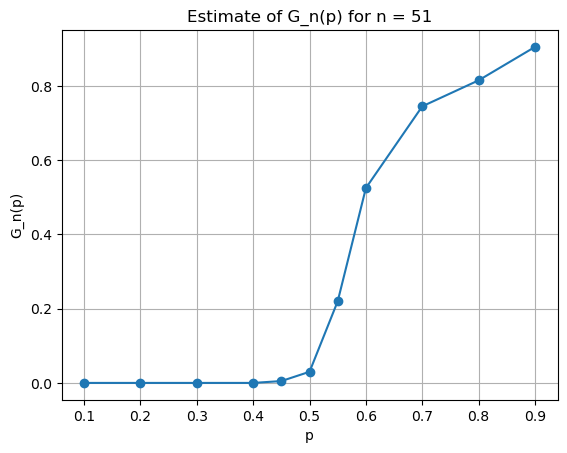

In [15]:
# simple plot
plt.plot(p_values, results, marker='o')
plt.xlabel("p")
plt.ylabel("G_n(p)")
plt.title("Estimate of G_n(p) for n = 51")
plt.grid(True)
plt.show()

# Section5: Triangular Lattice and Universality of Percolation

## 5.1: Percolation on Triangular latteries 

In section 1-4, we have investigated on square and retanglar grids with 4 adjacent sites, and observed their behaviour on percolation. Now, we will bring the experiment to triangular lattice with 6 adjacent sides, which we will be focusing on:

- Simulate percolation for different $p$

- Estimating the probability of percolation $F_n(p)$ for different $p$

- Plotting the curve 

- Estimating the critical probability $p_c$

Because there are **6** adjacents for a trianglar lattice instead of **4**, we cannot reuse the same model and simulation as before. Although we still implement the simulation on a square array, we need to add two extra diagonal directions $(1, 1)$ and $(-1, -1)$, so we can link all the trianglar sites for simulation.


In [16]:
# Returning the neighbours of site for Triangular lattice
def neighbours_triangular(i, j, n):
    # There are 6 neighbours for each site
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1)]

    # Check all directions
    for di, dj in directions:
        new_i = i + di
        new_j = j + dj

        # check if (new_i, new_j) is inside the grid
        if 0 <= new_i < n and 0 <= new_j < n:
            yield new_i, new_j

# Using BFS function to check left-right connectivity
def has_left_right_crossing_tri(grid):
  
    n = grid.shape[0]  

    # Check if the site is visited
    visited = np.zeros_like(grid, dtype=bool)

    # Using Breadth-first search
    queue = deque()

    # Start from open sites on left edge(column j = 0)
    for i in range(n):
        if grid[i, 0]:          
            visited[i, 0] = True
            queue.append((i, 0))

    # Breadth-first search 
    while queue:
        i, j = queue.popleft()

        # Success: if we reach the right boundary = left-right yellow path exist
        if j == n - 1:
            return True

        # Explore all triangular neighbours
        for new_i, new_j in neighbours_triangular(i, j, n):

            # Only visit neighbour site that is yellow and not visited yet
            if grid[new_i, new_j] and not visited[new_i, new_j]:
                visited[new_i, new_j] = True
                queue.append((new_i, new_j))


    # Fail to percolate: when we empty the queue = no left-right yellow path exist
    return False


# Use Monte Carlo estimate to approximate probability of percolation F_n(p)
def estimate_Fn_tri(n, p, trials=1000):

    count = 0
    for _ in range(trials):
        grid = sample_grid(n, p)  # generate random grids 
        if has_left_right_crossing_tri(grid): # if percolate then count as success
            count += 1

    return count / trials # Fraction of success trial


### Estimating the critical point of site percolation on the triangular lattice

After that, We estimate $ F_n(p)$
for different grid size $n$ and probability $p$ then generate **a curve plot** across four grid sizes $$n = 20, 30, 80, 120$$, with open site probability $p \in [0.3,0.8]$, to compare the behavior of $F_n(p)$.

Then, we estimate $ F_n(p)$ for each pair of grid sizes $n$ and oepn sites probability $p$. We generate 1000 radom grids for each pair, and count how many of them percolate. 
Also, for each value of $p$, we estimate $ F_n(p)$ for 300 trials(Monte Carlo simulation) for us to compute the curve to reduce runtime.

Computing F_n(p) for triangular lattice, n = 20
Computing F_n(p) for triangular lattice, n = 40
Computing F_n(p) for triangular lattice, n = 60
Computing F_n(p) for triangular lattice, n = 120


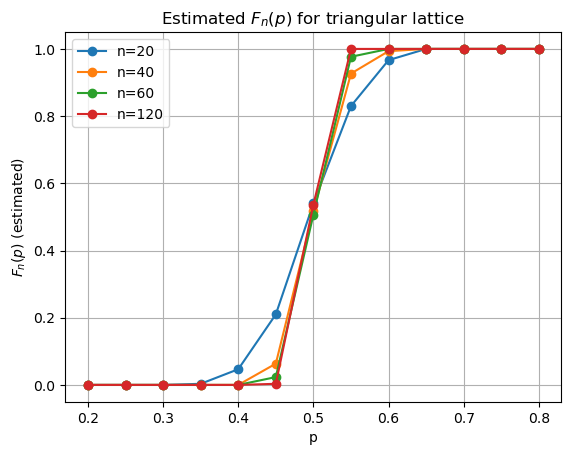

In [17]:
# compute estimated F_n(p) for n and p
def compute_Fn_curve_tri(n, p_values, trials=1000):

    Fn_vals = [] # storing estimated values

    for p in p_values:
        Fn_hat = estimate_Fn_tri(n, p, trials=trials) # Monte Carlo simulator
        Fn_vals.append(Fn_hat)
    return np.array(Fn_vals)


# Plot a curve plot of F_n(p) against p with some griad sizes n
n_values = [20, 40, 60, 120] # different grid size n
ps = np.linspace(0.2, 0.8, 13) # Evenly spaced p
trials_per_point = 300 # Monte Carlo trials

results_tri = {}

for n in n_values:
    print(f"Computing F_n(p) for triangular lattice, n = {n}")
    results_tri[n] = compute_Fn_curve_tri(n, ps, trials=trials_per_point)

# Plotting the curves
plt.figure()
for n in n_values:
    plt.plot(ps, results_tri[n], marker="o", label=f"n={n}")

# Labelling
plt.xlabel("p")
plt.ylabel(r"$F_n(p)$ (estimated)")
plt.title(r"Estimated $F_n(p)$ for triangular lattice")
plt.legend()
plt.grid(True)
plt.show()


### Observation 
From the graph we can see that, 

- For $p$ between $0.2$ and $0.4$, the probability of percolation stays at $0$, which means almost no grids percolate. 

- For $p$ between $0.6$ and $0.8$, the probability of percolation stays at $1$, which means almost all grids percolate.

- The major transition occurs at $p \approx 0.5$

which suggest that the critical probabiltiy for percolation is $$p_c \approx 0.5.$$

Hence, the experiment shows that the transition in $F_n(p)$ will become sharper and get closer to $0.5$ as $n \to \infty$.

## 5.2: Power-Law behavior near $p_c$ 

In Section 4.2, we defined, 
$$ G_n(p) = \mathbb{P}(\text{there is a yellow path from the centre of the grid to the boundary}) $$
and its limit $$G(p) = \lim_{n \to \infty} G_n(p)$$

In this part, we study the behavior of $G_n(p)$ on the trianglar lattice. We aim to to proof when the probability of centre-to-boundary percolation $p$ is close to the critical probability $p_c$, it will behave as an asymptotic power law,

$$G(p_c + \varepsilon) \approx \text{const}\, \varepsilon^\beta \quad \text{as } \varepsilon \downarrow 0.$$



The therotical critical probability for percolation on the triangular lattice is $$p_c = \frac{1}{2}$$ (Smirnov & Werner) [3], we will use this exact value to estimate the exponent $ \beta $ in the power law.



### Estimating G_n(p) for the triangular lattice

In this section, we focus on,

1. Estimate $G_n(p) = \mathbb{P}(\text{centre is connected to the boundary})$ for grid size $n$ by BFS.

2. Find Monte Carlo estimate $G_n(p)$ for tranglar lattice, by generating random grids for each $p$ and find its connectivity from centre to boundary.

3. Estimatinng $G_n(p)$ with different epsilons for probability $p = p_c + \varepsilon$ and random odd grid size $n$, for exact critical value $p_c = 0.5$.


In [18]:
# 1. centre to boundary percolation 
def centre_reaches_boundary_tri(grid):
    
    n = grid.shape[0]
    mid = n // 2   # assume n is odd so there is a centre

    # If the centre is not yellow, there is no centre-to-boundary path
    if not grid[mid, mid]:
        return False
    
    # visited 
    visited = np.zeros_like(grid, dtype=bool)
    queue = deque()

    # Start from centre(BFS)
    visited[mid, mid] = True
    queue.append((mid, mid))

    # BFS process
    while queue:
        i, j = queue.popleft()

        # succeed = If we reach any boundary 
        if i == 0 or i == n - 1 or j == 0 or j == n - 1:
            return True

        # Explore all 6 neighbours
        for new_i, new_j in neighbours_triangular(i, j, n):
            # Check if the neighbours are open and not visited 
            if grid[new_i, new_j] and not visited[new_i, new_j]:
                visited[new_i, new_j] = True
                queue.append((new_i, new_j))

    # Fail: no percolation exist in this grid = False
    return False


# 2. Monte Carlo estimate G_n(p) for tranglar lattice
def estimate_Gn_tri(n, p, trials=1000):

    count = 0
    for _ in range(trials):
        grid = sample_grid(n, p)  # generate sample grids 
        if centre_reaches_boundary_tri(grid):
            count += 1

    return count / trials # The success rate of percolation tests


# 3. Estimate G_n(p) with different epsilons
pc = 0.5    # critical probability
epsilons = np.array([0.01, 0.02, 0.03, 0.05, 0.07, 0.10])  # small epsilons
ps = pc + epsilons

n = 121       # odd grid size, so there will be a centre site
trials = 800  

# Compute G_n(p)
G_vals = np.array([estimate_Gn_tri(n, p, trials=trials) for p in ps])
print("eps:", epsilons)
print("G_n(p):", G_vals)



eps: [0.01 0.02 0.03 0.05 0.07 0.1 ]
G_n(p): [0.4125 0.47   0.4925 0.53   0.5425 0.5975]


$G$ has an asymptotic power law behaviour near $p_c$,
$$G(p_c + \varepsilon) \approx C\,\varepsilon^\beta 
\qquad \text{as } \varepsilon \downarrow 0,$$ 

where $C$ is the constant. We estimate the critcial exponent $\beta$ below,

4. Take logarithms for $G(p_c + \varepsilon)$, since it is difficult to calculate with constant $C$.

5. Plot a graph with coordinates $\log G(p_c + \varepsilon)$ and $\log \varepsilon $.


### Estimate the critical exponent β

Since $G$ has an asymptotic power law behaviour near $p_c$,
$$G(p_c + \varepsilon) \approx C\,\varepsilon^\beta 
\qquad \text{as } \varepsilon \downarrow 0,$$ 

We use log regression, since it is almost linear after taking logarithm, it is easlier for us to measure and study the behavior when the critical probability $p_c$ is near and slightly greater than $\frac{1}{2}$.

We take log for both sides,
$$\log G(p_c + \varepsilon) = \log (C\ \varepsilon^\beta)$$
$$\log G = \log (C) + \beta\log (\varepsilon)$$
, which is similar to a linear form, with slope of the regression line equals to $\beta$.

Estimated beta: 0.1497915535462727
Estimated log C: -0.18620245004463284


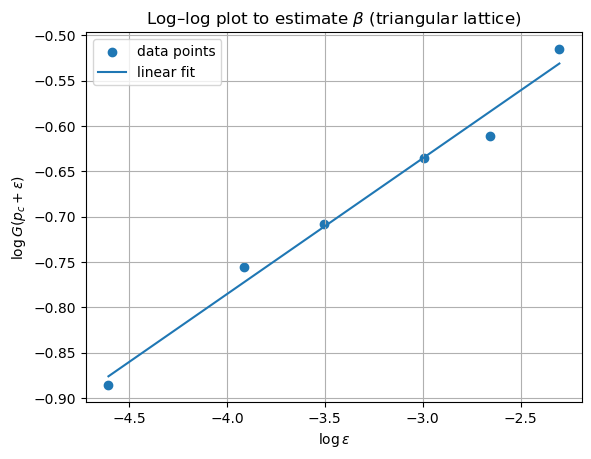

In [19]:
# 4. Fit a power law(log regression)
# Remove G = 0, since log(0) is undefined
mask = G_vals > 0
eps_nonzero = epsilons[mask]
G_nonzero = G_vals[mask]

log_eps = np.log(eps_nonzero)
log_G   = np.log(G_nonzero)

# log_G ≈ beta * log_eps + logC
beta_est, logC_est = np.polyfit(log_eps, log_G, 1)

print("Estimated beta:", beta_est)
print("Estimated log C:", logC_est)


# 5. Plot
plt.figure()
plt.scatter(log_eps, log_G, label="data points")
plt.plot(log_eps, beta_est * log_eps + logC_est, label="linear fit")

plt.xlabel(r"$\log \varepsilon$")
plt.ylabel(r"$\log G(p_c + \varepsilon)$")
plt.title("Log–log plot to estimate $\\beta$ (triangular lattice)")
plt.legend()
plt.grid(True)
plt.show()

**In the graph**, $\log G$ against $\log (\varepsilon)$ is approxiamtely linear, which indicates that $G(p_c + \varepsilon)$ follows a power law when $p$ is slightly above the critical value $\frac{1}{2}$.

After running multiple simulations, we obtain an estimate 
$$0.12 \lesssim \hat{\beta} \lesssim 0.15$$
, which is close to the theoretical exponent $\beta =\frac {5}{36}$.

Therefore, our analysis shows that $G(p_c+ \varepsilon)$ has an asymptotic power law behaviour near $p_c$, and we can estimate the exponent to be
$$\beta \approx 0.13$$

## 5.3  Percolation for Equilateral Triangular Latties

In this section, we study percolation on trianglar lattice at the critical probability $$p = p_c = 0.5.$$

For the triangular lattice, we take a region which shaped as an equilateral triangle with each side length $n$. We are interested in the function $T_n(p)$ which is the probability that there exists a yellow path connecting the base of the triangle to the segment length $rn$ on the right side of the triangle that extends down from the top vertex.
For $n \to \infty$,
$$\lim_{n \to \infty}T_n(r) = T(r) = r $$
which we will proof in this section.

### Implementation
1. First, we need to generate some random Triangular Latties in equilateral triangle shape. We generate a normal Triangular Lattice first, then remove all the sites lying outside of the triangle. 

2. Next, Identify the base and the target segment on the top right side of the triangle for each orientation.

3. We then build a function that perform a single Monte-Carlo trial to check connectivity of the region base and the $rn$ segment using BFS.



In [20]:

# Check if the site is inside the triangle
def is_in_triangle(i, j, n):
    return (0 <= i <= n) and (0 <= j <= n) and (i + j <= n)

# definte neighbours
def neighbours_triangular_true(i, j, n):
    directions = [
        (1, 0),   # right
        (-1, 0),  # left
        (0, 1),   # up
        (0, -1),  # down
        (1, -1),  # diagonal
        (-1, 1),  # diagonal
    ]
    for di, dj in directions:
        ni, nj = i + di, j + dj
        if is_in_triangle(ni, nj, n):
            yield ni, nj


# generate random triangular percolation models
def generate_triangle_config(n, p=0.5, rng=None):

    if rng is None:
        rng = np.random.default_rng()

    # generate random (n+1) x (n+1) grid with probability p is open site
    grid = rng.random((n + 1, n + 1)) < p

    # 
    for i in range(n + 1):
        for j in range(n + 1):
            if not is_in_triangle(i, j, n): # outside region
                grid[i, j] = False

    return grid  # return the triangle model



# Get base and target segment in different rotation
def get_base_and_target(n, r, orientation):
  
    # Orientations 0: Base AB, segment on BC
    # Orientations 1: Base BC, segment on CA
    # Orientations 2: Base CA, segment on AB
    r = float(r)
    k = int(np.floor(r * n))   # number of lattice steps along side

    base_sites = []
    target_mask = np.zeros((n + 1, n + 1), dtype=bool)

    # Orientations 0: Base AB, segment on BC
    if orientation == 0:
        for i in range(n + 1):
            if is_in_triangle(i, 0, n):
                base_sites.append((i, 0))

        # right-side segment on BC 
        for t in range(k + 1):
            i, j = t, n - t
            if is_in_triangle(i, j, n):
                target_mask[i, j] = True

    # Orientations 1: Base BC, segment on CA
    elif orientation == 1:
        for t in range(n + 1):
            i, j = t, n - t
            if is_in_triangle(i, j, n):
                base_sites.append((i, j))

        # right-side segment on CA
        for j in range(k + 1):
            i = 0
            if is_in_triangle(i, j, n):
                target_mask[i, j] = True

    # Orientations 2: Base CA, segment on AB
    elif orientation == 2:
        for j in range(n + 1):
            if is_in_triangle(0, j, n):
                base_sites.append((0, j))

        # right-side segment on AB 
        for t in range(k + 1):
            i, j = n - t, 0
            if is_in_triangle(i, j, n):
                target_mask[i, j] = True

    else:
        raise ValueError("orientation must be 0, 1, or 2")

    return base_sites, target_mask


# Function detect whether a path exist between right segment and base
def trial_Tn_single(n, r, p=0.5, orientation=0, rng=None):

    grid = generate_triangle_config(n, p=p, rng=rng)
    base_sites, target_mask = get_base_and_target(n, r, orientation)

    visited = np.zeros((n + 1, n + 1), dtype=bool)
    queue = deque()

    # Start from the base
    for (i, j) in base_sites:
        if grid[i, j] and not visited[i, j]: # Check if open and not visited 
            visited[i, j] = True
            queue.append((i, j))

    # BFS
    while queue:
        i, j = queue.popleft()

        # Success = path exist
        if target_mask[i, j]:
            return True

        # explore 6 neighbours 
        for ni, nj in neighbours_triangular_true(i, j, n):
            if grid[ni, nj] and not visited[ni, nj]:
                visited[ni, nj] = True
                queue.append((ni, nj))

    # Fail = no path exist
    return False



Then, we will try to

4. Estimate $T_n(r)$ with different $r$ and orientations by repeating the trial.

5. Compute $T_n(r)$ with whole list of $r$ values.

6. Generate the final plot for $T_n(r)$ against $r$, for $n = 61$.

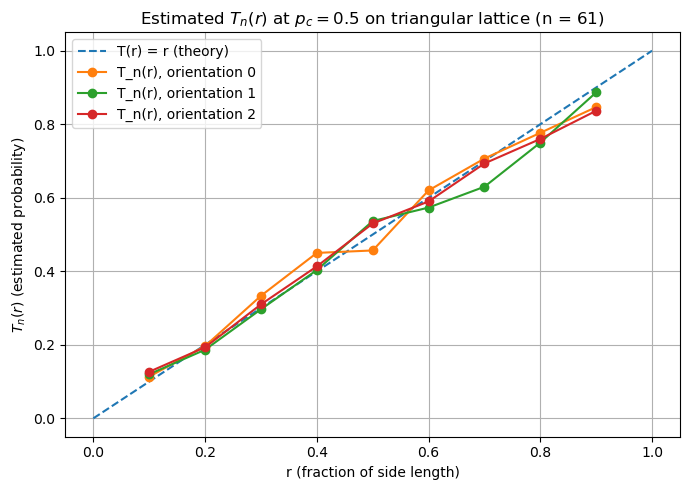

In [21]:
# Estimate T_n(r) with different r and orientations
def estimate_Tn(n, r, p=0.5, num_trials=200, orientation=0, rng=None):
    
    if rng is None:
        rng = np.random.default_rng()

    successes = 0 # count success

    for _ in range(num_trials):
        # Simulation
        if trial_Tn_single(n, r, p=p, orientation=orientation, rng=rng):
            successes += 1

    return successes / num_trials # Return the success rate 


# Compute T_n(r) with list of r values 
def estimate_Tn_curve(n, r_values, p=0.5, num_trials=200, orientation=0, rng=None):
    r_values = np.array(r_values, dtype=float)
    T_values = []

    for r in r_values:
        T_r = estimate_Tn(n, r, p=p, num_trials=num_trials, orientation=orientation, rng=rng)
        T_values.append(T_r)

    return r_values, np.array(T_values)



# Curve plot: T_n(r) against r values 
def plot_Tn_curves_for_orientations(n, r_values, p=0.5, num_trials=200):

    rng = np.random.default_rng(12345)  

    plt.figure(figsize=(7, 5))

    # Theoretical T(r) = r
    r_dense = np.linspace(0, 1, 200)
    plt.plot(r_dense, r_dense, linestyle="--", label="T(r) = r (theory)")

    labels = {
        0: "orientation 0",
        1: "orientation 1",
        2: "orientation 2",
    }

    # Estimate and plot T_n(r) for three orientations
    for orientation in [0, 1, 2]:
        r_vals, T_vals = estimate_Tn_curve(
            n,
            r_values,
            p=p,
            num_trials=num_trials,
            orientation=orientation,
            rng=rng
        )
        plt.plot(r_vals, T_vals, marker="o", label=f"T_n(r), {labels[orientation]}")
    #label
    plt.xlabel("r (fraction of side length)")
    plt.ylabel(r"$T_n(r)$ (estimated probability)")
    plt.title(f"Estimated $T_n(r)$ at $p_c = {p}$ on triangular lattice (n = {n})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# T_n(r) at p = 0.5 plot
p_c = 0.5
n = 61
num_trials = 300                
r_values = np.linspace(0.1, 0.9, 9) 

plot_Tn_curves_for_orientations(n, r_values, p=p_c, num_trials=num_trials)


### Observation and summary

From the plot, we can see that the estimated probability increases gradually and almost linearly as 
$r$ increases. The estimated probability $T_n(r)$ curves closely follow the growth of $r$ for all three orientations, we almost get the same results for all the curves. Therefore, we can conclude that, in general,
$$T_n(r) \approx r$$
which is consistent with Cardy’s formula in the scaling limit. This also shows that rotating the region does not make a significant difference to the $T_n(r)$.

# Section6: Alternate sampling method 

## 6.1: Wall-Following Percolation Detection 

### A different method for detecting crossings —— "Wall-following"

In the previous core part, We mainly use the BFS (Breathd First Search) method, which is starting from the left boundary, flood-fill search all reachable yellow sites outward, and then determine if the right boundary has been reached.

In this question, we use a different method for detecting crossings —— "wall-following". The core concept:
**Moving along "reachable and disreachable boundary"** , like walking along one side of the wll whicle walking through a maze to determine if there is a path from left to right.

In plain English：
- If there is a path from left to right, we can definitely find the "exit" by walking along the boundary between yellow and blue sites;
- If there is not a path from left to right, the boudary would be a closed loop.If we walk along the wall, we would back to the starting site.

Therefore, if we can walk along the boundary, then we can distinguish if it is percolartion.

###  Algorithm description

1. Start from **the first yellow site** $(i, 0)$ on the left boundary as a origin
2. Set a original direction (Such as "right"), and use **left-hand rule**:
   - Give priority to trying to **turn left** then go forward;
   - If turning left is not possible, try **going straight**;
   - If that is still not possible, try **turning right**;
   - If none of the three directions work, finally try making a U-turn.
3. Each step is only allowed to move to a site that is inside the grid and yellow, and update the current position and current direction.
4. If the right boundary $j = n - 1$ is reached during the walk, there is a through path from left to right.
5. To avoid an infinite loop when percolation does not occur, we keep track of the 'states' we have visited (position + direction). If we return to the exact same state again, it indicates that we have gone around the same boundary once, and at this point, we determine that a percolating path **does not exist**.

Since this method only explores the **outer boundary** of the yellow area, in many cases the number of grid points visited is much smaller than BFS/DFS.

### Code Implementation
The following code assumes that the grid is represented by a 2D array M in numpy.

$M[i, j] == 1$ represent yellow (open);

$M[i, j] == 0$ represent blue (blocked).


In [22]:
# Directions: right, down, left, up (clockwise)
DIRS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def wall_follow_from_start(M, start_i):
    # Wall-following from row start_i on the left edge
    n = M.shape[0]
    i, j = start_i, 0
    dir_idx = 0  # face right

    visited_state = set()
    visited_state.add((i, j, dir_idx))
    explored = 0

    while True:
        explored += 1

        # reached right edge → percolation
        if j == n - 1:
            return True, explored

        moved = False

        # left-turn → straight → right-turn → back
        for k in [dir_idx - 1, dir_idx, dir_idx + 1, dir_idx + 2]:
            d = k % 4
            di, dj = DIRS[d]
            ni, nj = i + di, j + dj

            # move only to yellow cells
            if 0 <= ni < n and 0 <= nj < n and M[ni, nj] == 1:
                i, j, dir_idx = ni, nj, d
                state = (i, j, dir_idx)

                # loop detected → no percolation
                if state in visited_state:
                    return False, explored
                visited_state.add(state)

                moved = True
                break

        # no valid move → blocked
        if not moved:
            return False, explored


def has_path_wallfollowing(M):
    # Try all yellow cells on the left edge
    n = M.shape[0]
    for i in range(n):
        if M[i, 0] == 1:
            return wall_follow_from_start(M, i)
    return False, 0

A simple example:

In [23]:
def sample_grid(n, p):
    # generate n×n grid, yellow=1 with prob p
    return (np.random.rand(n, n) < p).astype(int)

n = 50
p = 0.6
M = sample_grid(n, p)

crossed, explored = has_path_wallfollowing(M)

print(f"Left-to-right path exists: {crossed}")
print(f"Sites explored by wall-following: {explored}")

Left-to-right path exists: False
Sites explored by wall-following: 21


### Experimental Results 
We experimented with different 
 multiple times and recorded the number of yellow grids explored that wall-following accessed in each run. The overall results are as follows:
 
 1. When $p < p_c$ or $p > p_c$

 In the two situations, they are as described by Stauffer, D., & Aharony, A in [1], the structure of yellow area is relatively simple:
 - $p < p_c$: The yellow sites are sparse, with almost no paths;
 - $p > p_c$: The yellow sites almost fill the grid, it is easy to find a path.

 At this time, the path length of wall-following along the boundary has an approximately linear relationship with the system size:
 
 $$ explored \approx O(n)$$

**Note: O(n) means growth on the order of n.**

 2. When $p \approx p_c$

 the boundary of the yellow cluster becomes highly irregular and exhibits the typical fractal structure of critical percolation.

 In this regime:
- The boundary is long, highly curved, and locally complex;
- The number of sites explored by the wall-following algorithm increases significantly.
We observed in this experient：

$$\text{The increasing speed of explored between } O(n) \text{ and } O(n^2)$$

This substantiates Stauffer, D., & Aharony, A conclusion in [1].

### Fractal Interpretation
The boundary of a critical percolation cluster has a fractal dimension:
$$D_\text{boundary} \approx 1.89$$

Therefore,when it is near $p_c$ ,the boundary length grows faster with $n$, which is consistent with our experimental observations.


## 6.2: Uniform Random Labels & Minimum Threshold Estimation 

First, I give each site an independent Uniform [0,1] label. Then for a given $p$, I colour the sites with label $< p$ yellow. This gives the coloured grid for the chosen value of $p$.

In [24]:
# make an n×n grid of random values in [0,1]
def label_grid(n):
    return np.random.rand(n, n)
# yellow if the label is smaller than p
def p_grid(labels, p):
    return (labels < p)


Next, I check whether a given coloured grid contains a yellow path from left side to right side. I begin with any yellow sites in left column and gradually add the yellow neighbours. If one of those sites reaches the right column, that means the grid spans.

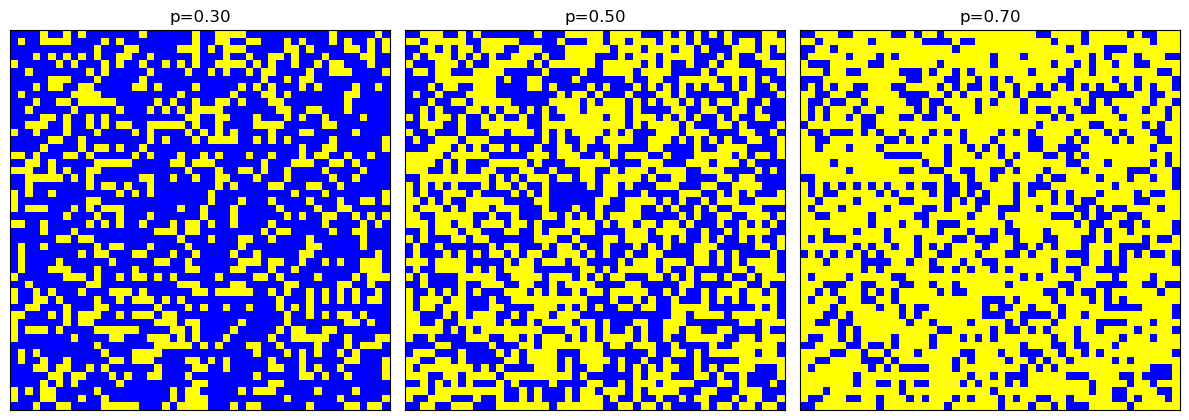

In [25]:
# show the grid
def show_grid(grid, title=None):
    plt.imshow(grid, cmap="viridis")
    plt.xticks([])
    plt.yticks([])
    if title:
        plt.title(title)
    plt.show()

def check_path(grid):
    # check if there is a path from left to right
    n = grid.shape[0]

    # cells we can reach so far
    reach = set()

    # start from yellow cells in the left column
    for i in range(n):
        if grid[i, 0]:
            reach.add((i, 0))

    updated = True
    while updated:
        updated = False
        reach_new = set(reach)

        for i, j in reach:
            # this path reaches right side
            if j == n - 1:
                return True
            # check the four neighbouring cells
            for a, b in [(i+1,j), (i-1,j), (i,j+1), (i,j-1)]:
                if 0 <= a < n and 0 <= b < n and grid[a, b] and (a, b) not in reach:
                    reach_new.add((a, b))
                    updated = True

        reach = reach_new

    return False

# show that more sites turn yellow as p gets bigger, so the first p that spans is the minimum
from matplotlib.colors import ListedColormap
yellow_blue = ListedColormap(["blue", "yellow"])
def main():
    # set up the random labels
    n = 50
    labels = label_grid(n)
    # three p values to compare
    p = [0.3, 0.5, 0.7]  
    # put the three plots
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    for i, p in enumerate(p):
        ax = axes[i]
        grid_p = p_grid(labels, p)
        ax.imshow(grid_p, cmap=yellow_blue)
        ax.set_title(f"p={p:.2f}", fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()
main()

Finally, I try different p values to see when the grid first spans. I open the sites with labels < p and check whether it connects from left to right. As soon as a spanning path appears, I take that p as the smallest one that makes the grid span.

In [26]:
# Find the smallest p 
def find_min_p(labels, steps=200):
    # try p values from 0 to 1 in small steps
    p_values = np.linspace(0, 1, steps)
    # check each p until the grid percolates
    for p_value in p_values:
        open_sites = p_grid(labels, p_value)
        # check if it spans
        if check_path(open_sites):
            return p_value 
    # if no spanning path appears
    return None   

labels = label_grid(30)
print(find_min_p(labels))

0.5728643216080402


### Summary

Overall, once each site has a random label, increasing p turns more sites yellow. The first time a yellow path goes from left to right gives the minimum p. Using this method, I can find this minimum p directly from the labelled grid.

# Conclusion

(by Heying)

In this project, we explored **percolation** by writing our own simulations and trying different methods check how the clusters is growing. We started with a square grid and observed **the connections from left to right**. Later, the same idea was extended to the triangular lattice to see how the geometric shape changed the results. Setting up the grids by ourselves and testing these different structures helped us understand the introduction in a more practical way.

To make the experiment **efficiently**, we also improved our search function by switching to a simple BFS. Once the grid becomes larger, the method makes a big difference. This allowed us to run many **Monte Carlo experiments** and estimate $F_n(p)$ and $G_n(p)$, including the case from the centre to the boundary. When we compared the results, the sudden changes in behaviour at different $p$ values were obvious in **both the square and triangular models**, which matches the idea of a critical probability mentioned at the beginning.

Overall, through the work with random grids, path-checking methods, and the two different lattice shapes, we got a more intuitive picture of percolation. Seeing our own plots change made the theory feel more concrete, and we feel that doing everything step by step helped us understand the topic in a more meaningful way.


## Bibliography

$[1]$ Stauffer, D., & Aharony, A. 2018. Introduction to percolation theory. <em>Taylor & Francis</em>.

$[2]$ Newman, M. E. J., & Ziff, R. M. 2000. Efficient Monte Carlo algorithm and high-precision results for percolation. <em>Physical Review Letters</em>, 85(19), 4104.

$[3]$ Smirnov, S., & Werner, W., 2001. Critical exponents for two-dimensional percolation. <em>Mathematical Research Letters</em>, 8(5–6), pp. 729–744. (arXiv:math/0109120).


